In [ ]:
import io
import sys
#sys.setrecursionlimit(10**7)
from collections import deque,defaultdict
from heapq import heappush,heappop 
from itertools import product,combinations,accumulate
from bisect import bisect_right,bisect_left 
def input(): return sys.stdin.readline().strip()
def INT(): return int(input())
def MAP(): return map(int,input().split())
def LIST(): return list(map(int,input().split()))
INF = float('inf')
import math
import random
dirc = [(0,1),(0,-1),(1,0),(-1,0)]
dirc2 = [(0,1),(0,-1),(1,0),(-1,0),(-1,-1),(-1,1),(1,-1),(1,1)]
mod = 10**9+7
mod2 = 998244353

: 

## アルゴリズム編

### DP

#### 基本的なDP

<DPで求めるものパターン>
- 最小値・最大値
- 数え上げ

<DP問題を解く流れ>
1. DPテーブルの定義を考える
   - 問題を解くにはどのような情報が必要かを考えることが重要
   - テーブルのサイズは制約から見えてくるので、欲しい条件から考えるのも一つの手
   - DPテーブルは大きめにとることを強く勧める
   - 初期値及び添字には注意する(初期条件が間違うと全てが終わる)
   - dpの長さが小さいとき、初期値の部分が配列のサイズを超える可能性があるので注意
   - 基本的には1-indexにした方が解きやすいかも
2. 漸化式(遷移)を考える
   - 遷移には色々なパターンがあるので問題に応じてどのようにすれば答えを求めることができるかを考える
   - 条件を満たす場合(例えば選択した場合)とそうでない場合のそれぞれ遷移を考える必要がある
3. 状態、計算量を減らせる部分があったら減らす
   - pythonだと計算量がc++よりもかなりかかってしまうため、基本的にはpypyで提出する
   - 工夫できる部分はできるだけ工夫する
   - gridの座標を二次元ではなく、一次元で管理するなど
   - 遷移をよく見ると区間和になっているDPは遷移→累積和を求めておくと高速化できる(貰うDPで考えると楽)

<DPを解く上で注意すべきこと>
- なにか規則性を見つけて「正しい選び方の法則」のようなものを見つけようとしがち
- すべて探索することが大切、単純に探索すると計算時間が間に合わない場合は、どのように計算結果をまとめていくかを考えるとよい
- コーナーケースの見落としに注意する(自分が予期していない場合で見落としている可能性がある)

#### グラフ×DP

#### ダブリング

#### 区間DP

#### LIS

#### BITDP

### グラフ問題

<グラフ問題のアプローチ>
- BFS : 最小手が関係するとき
- DFS : その他の問題においてO(V+E)で解けるとき
- 特に部分木に関する問題では、BFSでは解けない

<計算量のお話>
- ダイクストラ:優先度付きキューO(V+ElogV)
- 幅優先探索:キュー使用 O(V+E)
- 01-BFS:両端キュー O(V+E)

<用語まとめ>
1. 木:平路を持たないような連結なグラフ
   - グラフの点の数がNの時辺の数はN-1
   - 隣接していない任意の２点を加えると閉路が一つだけできる
   - グラフの辺を一本でも消すと連結ではなくなる

2. 森:閉路を持たないようなグラフのこと
  - イメージは木の集まり(なお木単体も森である)

3. 根付き木
  - 木に対して、特定の1つの頂点を特別扱いして根とよび、根をもつ木のことを根付き木と呼ぶ。
  - 根をもたない木に対して、そのことを強調するときは根なし木と呼ぶ。

4. 部分木
  - 根付き木のある頂点viを根とする部分木はvを根とした木
  - 頂点viも当然その中に含まれるのに注意!(逆になぜ含まれないと思っていたか謎)

#### BFS

＜TIPS＞

1. グラフを逆向きに貼って考える
  - マス(a,b)からマス(r,c)に動かせるか全てのマスでbfs→TLE
  - グラフの全ての辺を逆向きにして(r,c)からBFSでたどり着けるか判定すればO(HW)で解ける

2. 多点始点幅優先探索
  - 一点始点の幅優先探索と同じ用に、始点すべてをqueにappendしてよい



##### 最短経路への移動回数


1. 移動できる都市が未到達の場合 
   - cnt[nxt] = cnt[now]
2. 移動できる都市が到達済みの場合 最短経路の値が同じであれば

   - (dist[nxt]==dist[now]+1),cnt[nxt] += cnt[now]
(遷移前の数を足し合わせることで最短経路の数を更新)

In [ ]:
N,M = MAP()
G = [[] for _ in range(N)]
for _ in range(M):
    a,b = MAP()
    a,b = a-1,b-1
    G[a].append(b)
    G[b].append(a)
q = deque([0])
dist = [-1]*N
dist[0] = 0
dp = [0]*N
dp[0] = 1
while q:
    now = q.popleft()
    for nxt in G[now]:
        if dist[nxt]==-1:
            dist[nxt] = dist[now]+1
            q.append(nxt)
            dp[nxt] = dp[now]
            dp[nxt] %= mod
        else:
            if dist[nxt]==dist[now]+1:
                dp[nxt] += dp[now]    
print(dp[N-1]%mod)

##### BFSの経路復元

- 迷路（壁情報が与えられたver）における経路復元
- 壁情報の扱いに要注意！
- 幅優先探索の経路復元は直前の移動方向をx,yそれぞれ記憶する
- 復元する時は、ゴールから初めて、x,y = -1,-1になるまでwhileループでスタート地点まで逆行する

In [ ]:
si,sj,ti,tj,p = map(float,input().split())
si,sj,ti,tj = int(si),int(sj),int(ti),int(tj)
h = [input() for _ in range(20)]
v = [input() for _ in range(19)]
ans = ''
dist = [[-1]*20 for  _ in range(20)]
dist[si][sj]=0
q = deque()
q.append((si,sj))
prev_x = [[-1]*20 for _ in range(20)]
prev_y = [[-1]*20 for _ in range(20)]
while q:
    y,x = q.popleft()
    for dx,dy in dirc:
        ny,nx = y+dy,x+dx
        if 0<=ny<20 and 0<=nx<19:
            if h[ny][nx-1]=='1' and dx==1 and dy==0:
                continue
        if 0<=ny<20 and 0<nx<19:
            if h[ny][nx]=='1' and dx==-1 and dy==0:
                continue
        if 0<=ny<19 and 0<=nx<20:
            if v[ny][nx]=='1' and dx==0 and dy==-1:
                continue
        if 0<ny<19 and 0<=nx<20:
            if v[ny-1][nx]=='1' and dx==0 and dy==1:
                continue
        if not (0<=ny<20 and 0<=nx<20):
            continue
        if dist[ny][nx]==-1:    
            q.append((ny,nx))
            dist[ny][nx] = dist[y][x] + 1
            #直前のx方向、y方向の移動場所を記録しておく
            prev_x[ny][nx] = x
            prev_y[ny][nx] = y
score = dist[tj][ti]
x = tj
y = ti
field = [['.']*20 for _ in range(20)]
while x!=-1 and y!=-1:
    field[y][x]='o'
    px = prev_x[y][x]
    py = prev_y[y][x]
    x = px
    y = py
#経路復元
for i in range(20):
    for j in range(20):
        print(field[i][j],end='')
    print()


##### 01BFS


- 辺の長さが0または1である有向グラフにおいて、全頂点への最短経路の長さを効率時間で求める事ができる

<アルゴリズムにおけるポイント>
- 暫定最短距離が最も小さい点を選んでそこから伸びる辺で他の頂点の暫定最短距離
を更新する
- 辺の重みが0or1の2つしかない場合、BFSのdequeにおいて0に辺を用いた場合は先頭に、1の辺を用いた場合は末尾に加えることで処理することが出来る
- (この処理により、ある値が前側に、それより1大きいコストが後ろ側に固まっている状態を
保つことが出来る)
- 計算量をダイクストラO(V+ElogV)からO(V+E)に落とせる
- ノーコストの手段で移動する、何らかのコストや回数制限のある手段で移動の2通りの移動方法が与えられているような問題で帰着できる可能性がある

<方向転換の最小化>

- 現在向いている方向に1マス進む(コスト0)
- 向いている方向を変える(コスト1)
- スタート→ゴールを最小にする

1. 解法1(芝刈りBFS解):
  - 今いる地点から進行方向4箇所について、壁に突き当たるor現時点よりもコストが同じ以上
のところについて,同じコストでdistを更新する。
 - その後次にqueの先頭に入っている部分について
また同じ操作をする

2. 解法2(拡張BFS):
  - 辺の頂点に関する状態を拡張して考える.
  - dist[i][j][0-3]:マスi,jでそれぞれの方向に向く状態までの方向転換の最小回数
  - (nowx,nowy,直前の移動方向)の3つの組を一つの頂点として01dfs
  - 遷移は今向いている向きにコスト0で一回移動
現在のマスから移動せずにコスト1で向いている向きを変更の2種類
  - コスト0の遷移はappendleft,コスト1の遷移はappendする
  - 計算量O(N^2)定数倍重め、ダイクストラだとO(N^2*log(N))

##### 拡張BFS

- 移動先や頂点の情報にさらなる成約がある場合に頂点の情報を追加する

#### DFS

##### オイラーツアー(DFSのタイミング)
1. オイラーツアーとは
  - 根付きを根からDFSし根に戻ってくる行きと戻りの経路を1次元のテーブルに記録したもの

2. DFSのタイミング
```
def dfs(v,pre):
    #頂点が初めて探索されるタイミング(行きがけ)(上から下に行くタイミング)
    for u in G[v]:
        if u!=pre:
            dfs(u,v)
            #子の一つが探索終わったタイミング
    #頂点が探索終えたタイミング(帰りがけ) (下から上に行くタイミング)
```



#### LCA

#### ダイクストラ法

#### トポロジカルソート

#### ワーシャルフロイド法

#### SSC

#### 最小全域木

#### 最大流

### 区間問題

### 探索

### 貪欲法

## データ構造編

典型TIPSについて
- 複数データ構造で管理する(heapqとdeque,list二本,unionfindとsortedMultisetなど)
- 必要なデータをデータでもつ(多次元データになる)
- データを工夫して多次元でもつ(連想配列 in リスト,生徒番号も同時に管理する、クエリ先読みのためにクエリ番号も同時に管理するなど)




### deque

#### dequeの宣言について
- Sが文字列のとき
1. que = deque(S)
2. que = deque([S])
でqueの中身が異なるので注意。一文字ずつdequeに格納したい場合は前者

In [4]:
S = "hello"
que1 = deque(S)
que2 = deque([S])
print(que1)
print(que2)

deque(['h', 'e', 'l', 'l', 'o'])
deque(['hello'])


### heapq

* ヒープが存在するかどうかは、if hq:で
* heapqは自作クラスを使うと楽。

In [ ]:
import heapq
class Heapq:
    #最大値を取り出したいときは、desc=Trueにする
    def __init__(self, arr, desc=False):
        if desc:
            arr = [-a for a in arr]
        self.sign = -1 if desc else 1
        self.hq = arr
        heapq.heapify(self.hq)
    #最大or最小を取り出す
    def pop(self):
        return heapq.heappop(self.hq) * self.sign
    #値を追加する
    def push(self, a):
        heapq.heappush(self.hq, a * self.sign)
    #最大or最小を参照するだけ(なくならない)
    def top(self):
        return self.hq[0] * self.sign

### set

- **存在判定はsetだとO(1)でできる**
- 集合のandは&で行う
- グリッドの座標をsetで管理するのは典型

### UnionFind

- グループを管理するのに用いる
- 基本処理の計算量は約O(1)　詳しくはhttps://algo-method.com/descriptions/133で
- UnionFindはグループを生成するのは得意だが、壊すのは苦手
- 壊していく問題では逆から処理したり、クエリを先読みしてグラフを生成する順番にソートしてから処理するTIPSがある
- グループ1とグループ2両方で連結している個数について、dict[(uf1.root(i),uf2.root(i)]の連想配列で同じペアがいくつ出てくるかを管理することで高速で解ける
- xに合流してくる生徒のうち、クラスyに属している生徒の数をdp[uf.root(a)][c]:のように存在するクラスのみをcで連想配列のように管理する。併合の際に、小さい方から大きい方へマージすることで計算量を改善することができる
- 問題をグラフ問題に置き換えることで解くことができるものもある(例ABC206D)
- グラフの連結成分数は初期値はすべてつながっていない状態、つまり**N**であることに注意!
- unionする頂点番号を工夫する問題(ABC264E↓)
- 求めたいのは電気が通っている都市の数。発電所の個数は関係ない、つまり、発電所は複数あるが発電所を一つとしてカウントできる。
- N以降の頂点番号は、発電所をN一つにまとめることで、uf.size(N)で電気がつながっている
都市(+発電所一つ)の個数を知ることができる!
- クエリでグラフを連結する時に隣接リストとは別にUnionFindを用意し、同じ連結成分に属している時はその辺は追加しないようにする処理を追加することで計算量を落とすTIPSがある
- グリッド上の連結は移動方向に移動できる点があったら、二次元座標を一次元座標に変換して元の点と移動後の点を連結すれば良い





In [ ]:
from typing import List
class UnionFind:
    """0-indexed"""
    def __init__(self, n):
        self.n = n
        self.parent = [-1] * n
        self.__group_count = n  # 辺がないとき、連結成分はn個あります

    def unite(self, x, y):
        """xとyをマージ"""
        x = self.root(x)
        y = self.root(y)
        if x == y:
            return 0
        self.__group_count -= 1  # 木と木が合体するので、連結成分数が1減ります
        if self.parent[x] > self.parent[y]:
            x, y = y, x
        self.parent[x] += self.parent[y]
        self.parent[y] = x
        return self.parent[x]

    def is_same(self, x, y):
        """xとyが同じ連結成分か判定"""
        return self.root(x) == self.root(y)

    def root(self, x):
        """xの根を取得"""
        if self.parent[x] < 0:
            return x
        else:
            self.parent[x] = self.root(self.parent[x])
            return self.parent[x]

    def size(self, x):
        """xが属する連結成分のサイズを取得"""
        return -self.parent[self.root(x)]

    def all_sizes(self) -> List[int]:
        """全連結成分のサイズのリストを取得 O(N)"""
        sizes = []
        for i in range(self.n):
            size = self.parent[i]
            if size < 0:
                sizes.append(-size)
        return sizes

    def groups(self) -> List[List[int]]:
        """全連結成分の内容のリストを取得 O(N・α(N))"""
        groups = dict()
        for i in range(self.n):
            p = self.root(i)
            if not groups.get(p):
                groups[p] = []
            groups[p].append(i)
        return list(groups.values())

    def group_count(self) -> int:
        """連結成分の数を取得 O(1)"""
        return self.__group_count  

#### 橋の本数

橋:その辺を取り除いた時にグラフ全体が非連結になるような辺のこと

1. 全ての辺 e1=(u1,v1) に対して以下を実行する
 * e1 以外の全ての辺 e2=(u2,v2) について以下を実行する
 * u2 と v2 を Union-Find Tree 上の同じ集合にまとめる (unite)
2. u1 と v1 が同じ集合になければ、e1 を除いたグラフは非連結で、e1 は橋

橋についてわかりやすく
- 全ての辺について、それぞれの辺以外で連結したときにグループの個数が複数（＝グラフ全体が非連結）ならばその辺は橋になる

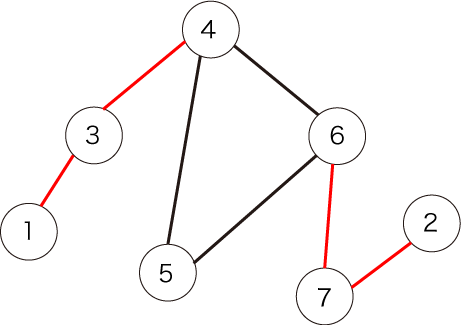

#### 無向グラフの閉路

*無向グラフの閉路→UnionFindでroot一致したら閉路
*有向グラフの閉路→トポロジカルソートができないとき閉路


### セグメントツリー


<ポイント>
- 区間に関する処理はセグメント木で可能だが、区間に対する更新を行うときは
遅延セグメント木を使う必要がある。

<遅延セグメント木>
- セグメント木：区間上の値を更新する、任意の区間上の最小値や合計値などを取得する
- 遅延セグメント木：区間更新、区間加算をするときは普通のセグメント木だと時間がかかってしまうため、遅延セグメント木を用いると良い。

In [ ]:
#普通のセグ木
def segfunc(x,y):
    '''
    区間の
    和→x+y
    差→x-y
    最小値→min(x,y)
    xor→x^y
    or→x|y
    最大公約数→math.gcd(x,y)
    '''
    return math.gcd(x,y)

class SegTree:
    '''
    セグメントツリーの構築は
    seg = SegTree(元のリスト、単位元、segfunc)
    単位元：どの数に対して演算を行っても元から変わることがない数
    和:0
    積:1
    or:0
    xor:0
    最大公約数:0
    最小値：大きな数 inf
    最大値：小さな数 -inf
    select(インデックス番号):値の参照 O(1)
    update(インデックス番号、値):値の更新O(logN)
    query(左端インデックス番号、右端インデックス番号):指定区間についての演算結果を返すO(logN)
    '''
    def __init__(self,x_list,init,segfunc):
        self.init=init
        self.segfunc=segfunc
        self.Height=len(x_list).bit_length()+1
        self.Tree=[init]*(2**self.Height)
        self.num=2**(self.Height-1)
        for i in range(len(x_list)):
            self.Tree[2**(self.Height-1)+i]=x_list[i]
        for i in range(2**(self.Height-1)-1,0,-1):
            self.Tree[i]=segfunc(self.Tree[2*i],self.Tree[2*i+1])

    def select(self,k):
        return self.Tree[k+self.num]

    def update(self,k,x):
        i=k+self.num
        self.Tree[i]=x
        while i>1:
            if i%2==0:
                self.Tree[i//2]=self.segfunc(self.Tree[i],self.Tree[i+1])
            else:
                self.Tree[i//2]=self.segfunc(self.Tree[i-1],self.Tree[i])
            i//=2

    def query(self,l,r):
        result=self.init
        l+=self.num
        r+=self.num+1

        while l<r:
            if l%2==1:
                result=self.segfunc(result,self.Tree[l])
                l+=1
            if r%2==1:
                result=self.segfunc(result,self.Tree[r-1])
            l//=2
            r//=2
        return result

In [ ]:
#遅延セグメントツリー2種類
#区間加算
#####segfunc#####
def segfunc(x, y):
    return min(x, y)
#################

#####単位元#####
ide_ele = 2**31 - 1
#################

class LazySegmentTree:
    """
    init(init_val, ide_ele): 配列init_valで初期化 O(N)
    add(l, r, x): 区間[l, r)にxを加算 O(logN)
    query(l, r): 区間[l, r)をsegfuncしたものを返す O(logN)
    """
    def __init__(self, init_val, segfunc, ide_ele):
        """
        init_val: 配列の初期値
        segfunc: 区間にしたい操作
        ide_ele: 単位元
        num: n以上の最小の2のべき乗
        data: 値配列(1-index)
        lazy: 遅延配列(1-index)
        """
        n = len(init_val)
        self.segfunc = segfunc
        self.ide_ele = ide_ele
        self.num = 1 << (n - 1).bit_length()
        self.data = [ide_ele] * 2 * self.num
        self.lazy = [0] * 2 * self.num
        # 配列の値を葉にセット
        for i in range(n):
            self.data[self.num + i] = init_val[i]
        # 構築していく
        for i in range(self.num - 1, 0, -1):
            self.data[i] = self.segfunc(self.data[2 * i], self.data[2 * i + 1])

    def gindex(self, l, r):
            """
            伝搬する対象の区間を求める
            lm: 伝搬する必要のある最大の左閉区間
            rm: 伝搬する必要のある最大の右開区間
            """
            l += self.num
            r += self.num
            lm = l >> (l & -l).bit_length()
            rm = r >> (r & -r).bit_length()

            while r > l:
                if l <= lm:
                    yield l
                if r <= rm:
                    yield r
                r >>= 1
                l >>= 1
            while l:
                yield l
                l >>= 1

    def propagates(self, *ids):
        """
        遅延伝搬処理
        ids: 伝搬する対象の区間 
        """
        for i in reversed(ids):
            v = self.lazy[i]
            if not v:
                continue
            self.lazy[2 * i] += v
            self.lazy[2 * i + 1] += v
            self.data[2 * i] += v
            self.data[2 * i + 1] += v
            self.lazy[i] = 0

    def add(self, l, r, x):
        """
        区間[l, r)の値にxを加算
        l, r: index(0-index)
        x: additional value
        """
        *ids, = self.gindex(l, r)
        l += self.num
        r += self.num
        while l < r:
            if l & 1:
                self.lazy[l] += x
                self.data[l] += x
                l += 1
            if r & 1:
                self.lazy[r - 1] += x
                self.data[r - 1] += x
            r >>= 1
            l >>= 1
        for i in ids:
            self.data[i] = self.segfunc(self.data[2 * i], self.data[2 * i + 1]) + self.lazy[i]


    def query(self, l, r):
        """
        [l, r)のsegfuncしたものを得る
        l: index(0-index)
        r: index(0-index)
        """
        *ids, = self.gindex(l, r)
        self.propagates(*ids)

        res = self.ide_ele

        l += self.num
        r += self.num
        while l < r:
            if l & 1:
                res = self.segfunc(res, self.data[l])
                l += 1
            if r & 1:
                res = self.segfunc(res, self.data[r - 1])
            l >>= 1
            r >>= 1
        return res

In [ ]:
#####segfunc#####
def segfunc(x, y):
    return min(x, y)
#################

#####ide_ele#####
ide_ele = 2**31 - 1
#################

class LazySegmentTree:
    """
    init(init_val, ide_ele): 配列init_valで初期化 O(N)
    update(l, r, x): 区間[l, r)をxに更新 O(logN)
    query(l, r): 区間[l, r)をsegfuncしたものを返す O(logN)
    """
    def __init__(self, init_val, segfunc, ide_ele):
        """
        init_val: 配列の初期値
        segfunc: 区間にしたい操作
        ide_ele: 単位元
        num: n以上の最小の2のべき乗
        data: 値配列(1-index)
        lazy: 遅延配列(1-index)
        """
        n = len(init_val)
        self.segfunc = segfunc
        self.ide_ele = ide_ele
        self.num = 1 << (n - 1).bit_length()
        self.data = [ide_ele] * 2 * self.num
        self.lazy = [None] * 2 * self.num
        # 配列の値を葉にセット
        for i in range(n):
            self.data[self.num + i] = init_val[i]
        # 構築していく
        for i in range(self.num - 1, 0, -1):
            self.data[i] = self.segfunc(self.data[2 * i], self.data[2 * i + 1])

    def gindex(self, l, r):
            """
            伝搬する対象の区間を求める
            lm: 伝搬する必要のある最大の左閉区間
            rm: 伝搬する必要のある最大の右開区間
            """
            l += self.num
            r += self.num
            lm = l >> (l & -l).bit_length()
            rm = r >> (r & -r).bit_length()

            while r > l:
                if l <= lm:
                    yield l
                if r <= rm:
                    yield r
                r >>= 1
                l >>= 1
            while l:
                yield l
                l >>= 1

    def propagates(self, *ids):
        """
        遅延伝搬処理
        ids: 伝搬する対象の区間 
        """
        for i in reversed(ids):
            v = self.lazy[i]
            if v is None:
                continue
            self.lazy[2 * i] = v
            self.lazy[2 * i + 1] = v
            self.data[2 * i] = v
            self.data[2 * i + 1] = v
            self.lazy[i] = None

    def update(self, l, r, x):
        """
        区間[l, r)の値をxに更新
        l, r: index(0-index)
        x: update value
        """
        *ids, = self.gindex(l, r)
        self.propagates(*ids)
        l += self.num
        r += self.num
        while l < r:
            if l & 1:
                self.lazy[l] = x
                self.data[l] = x
                l += 1
            if r & 1:
                self.lazy[r - 1] = x
                self.data[r - 1] = x
            r >>= 1
            l >>= 1
        for i in ids:
            self.data[i] = self.segfunc(self.data[2 * i], self.data[2 * i + 1])


    def query(self, l, r):
        """
        [l, r)のsegfuncしたものを得る
        l: index(0-index)
        r: index(0-index)
        """
        *ids, = self.gindex(l, r)
        self.propagates(*ids)

        res = self.ide_ele

        l += self.num
        r += self.num
        while l < r:
            if l & 1:
                res = self.segfunc(res, self.data[l])
                l += 1
            if r & 1:
                res = self.segfunc(res, self.data[r - 1])
            l >>= 1
            r >>= 1
        return res

### ハッシュ

- 文字列などのデータを整数値に対応づける
- ある状態や数列を一意なハッシュ値に変換することで、うまく判定や数え上げを行うことができる可能性がある
- Zobrist Hashは状態をハッシュ値にするのが得意(部分集合的な表現が得意)

In [ ]:
#数列のハッシュ化(数列を受け取ってハッシュ化したものに置き換える)
def hs():
    P = 8128812800000059
    L = [0]
    S = set()
    A = [int(a) for a in input().split()]
    s = 0
    for i, a in enumerate(A):
        if a not in S:
            S.add(a)
            s = (s + a * (a + 1346) * (a + 9185)) % P
        L.append(s)
    return L

### SortedMultiset

- 集合をソートされた状態を保ったまま要素をO(logN)で追加削除

- 下からx番目、上から~x番目:s[x] (計算量(O(√N)))
- 最大値、最小値を取り出したいときは
 最小値:s[0] 最大値:s[len(s)-1]
- xの個数 s.count(x)

In [ ]:
import math
from bisect import bisect_left, bisect_right, insort
from typing import Generic, Iterable, Iterator, TypeVar, Union, List
T = TypeVar('T')
class SortedMultiset(Generic[T]):
    BUCKET_RATIO = 50
    REBUILD_RATIO = 170

    def _build(self, a=None) -> None:
        "Evenly divide `a` into buckets."
        if a is None: a = list(self)
        size = self.size = len(a)
        bucket_size = int(math.ceil(math.sqrt(size / self.BUCKET_RATIO)))
        self.a = [a[size * i // bucket_size : size * (i + 1) // bucket_size] for i in range(bucket_size)]
    
    def __init__(self, a: Iterable[T] = []) -> None:
        "Make a new SortedMultiset from iterable. / O(N) if sorted / O(N log N)"
        a = list(a)
        if not all(a[i] <= a[i + 1] for i in range(len(a) - 1)):
            a = sorted(a)
        self._build(a)

    def __iter__(self) -> Iterator[T]:
        for i in self.a:
            for j in i: yield j
 
    def __reversed__(self) -> Iterator[T]:
        for i in reversed(self.a):
            for j in reversed(i): yield j
    
    def __len__(self) -> int:
        return self.size
    
    def __repr__(self) -> str:
        return "SortedMultiset" + str(self.a)
    
    def __str__(self) -> str:
        s = str(list(self))
        return "{" + s[1 : len(s) - 1] + "}"

    def _find_bucket(self, x: T) -> List[T]:
        "Find the bucket which should contain x. self must not be empty."
        for a in self.a:
            if x <= a[-1]: return a
        return a

    def __contains__(self, x: T) -> bool:
        if self.size == 0: return False
        a = self._find_bucket(x)
        i = bisect_left(a, x)
        return i != len(a) and a[i] == x

    def count(self, x: T) -> int:
        "Count the number of x."
        return self.index_right(x) - self.index(x)

    def add(self, x: T) -> None:
        "Add an element. / O(√N)"
        if self.size == 0:
            self.a = [[x]]
            self.size = 1
            return
        a = self._find_bucket(x)
        insort(a, x)
        self.size += 1
        if len(a) > len(self.a) * self.REBUILD_RATIO:
            self._build()
 
    def discard(self, x: T) -> bool:
        "Remove an element and return True if removed. / O(√N)"
        if self.size == 0: return False
        a = self._find_bucket(x)
        i = bisect_left(a, x)
        if i == len(a) or a[i] != x: return False
        a.pop(i)
        self.size -= 1
        if len(a) == 0: self._build()
        return True

    def lt(self, x: T) -> Union[T, None]:
        "Find the largest element < x, or None if it doesn't exist."
        for a in reversed(self.a):
            if a[0] < x:
                return a[bisect_left(a, x) - 1]

    def le(self, x: T) -> Union[T, None]:
        "Find the largest element <= x, or None if it doesn't exist."
        for a in reversed(self.a):
            if a[0] <= x:
                return a[bisect_right(a, x) - 1]

    def gt(self, x: T) -> Union[T, None]:
        "Find the smallest element > x, or None if it doesn't exist."
        for a in self.a:
            if a[-1] > x:
                return a[bisect_right(a, x)]

    def ge(self, x: T) -> Union[T, None]:
        "Find the smallest element >= x, or None if it doesn't exist."
        for a in self.a:
            if a[-1] >= x:
                return a[bisect_left(a, x)]
    
    def __getitem__(self, x: int) -> T:
        "Return the x-th element, or IndexError if it doesn't exist."
        if x < 0: x += self.size
        if x < 0: raise IndexError
        for a in self.a:
            if x < len(a): return a[x]
            x -= len(a)
        raise IndexError

    def index(self, x: T) -> int:
        "Count the number of elements < x."
        ans = 0
        for a in self.a:
            if a[-1] >= x:
                return ans + bisect_left(a, x)
            ans += len(a)
        return ans

    def index_right(self, x: T) -> int:
        "Count the number of elements <= x."
        ans = 0
        for a in self.a:
            if a[-1] > x:
                return ans + bisect_right(a, x)
            ans += len(a)
        return ans

### 数学問題

### 

## 典型TIPS

1. 反転はflagで管理する
2. 後ろから見る
3. データを2本で管理する
4. 償却解析(クエリ全体での計算量を解析)
5. 余事象を考える
6. クエリ先読み
7. マージテク
8. 数列圧縮(データを(要素,要素の個数)で管理する)


## ミスまとめ

- 入力を受け取る時に、複数行データをinput().split()で受け取る時に数値データを
文字型から数値型へ直すのを忘れないようにする

- 計算量の勘違い
```
for i in range(1,N)[::-1]:
    for v in G[i]:
```
→これのオーダーはO(N^2)じゃないよ!むしろO(N)寄り!

- 制約を見落とし本当によくやりがち!!!
- 毎回長い配列を作るのは計算量がかかってしまうので良くない
- 条件分岐漏れ